### Table of Contents

* [Case study classification project](#casestudy)
* [EDA - exploratory data analysis - get to know the data](#eda)
* [Get the sweet summary stats on each column to understand the distribution better](#summary)
* [Get a  representation of the numbers](#numbersrep)
* [Outliers](#outliers)
* [Box Plots](#boxplots)
* [Outliers](#outliers)
* [Pre-processing](#preprocessing)
* [Split off the dependant variable (label) ](#split)
* [TT split and get model](#ttsplit)
* [Apply model, train model](#applymoded)
* [Evaluate accuracy and test](#evaluate)
* [Visualising accuracy - ROC / AUC](#rocauc)
* [Data imbalanced -  SMOTE (oversample the minority class of the target label)](#smote)


* [sample](#sample)



## Case study classification project <a class="anchor" id="casestudy"></a>

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [2]:
# conda install -c conda-forge jupyter_contrib_nbextensions

In [3]:
# df = pd.read_csv('creditcardmarketing.csv')

In [4]:
df_original = pd.read_excel('creditcardmarketing.xlsx')

In [5]:
# save as a csv file to use in the SQL task
#import csv
#df_original.to_csv(r'new_creditcardmarketing_original.csv', index = False)

In [6]:

# create a copy of the dataaet
df = df_original

###  EDA - exploratory data analysis - get to know the data <a class="anchor" id="eda"></a>

In [7]:
# check information about the dataset
#df.dtypes
#df.info()

In [8]:
# cheack shape
#df.shape

In [9]:
# print the sum of null values 
#print(df.isnull().sum())

In [10]:
# standize the readers: replace spaces by _, put in lowercase, remove #
df.columns = df.columns.str.replace(' ', '_')
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace('#_', '')


In [11]:
# find the percentage of missing values
#pct_missing=24/18000
#pct_missing

<b>We found few missing values (less than 20%). so we are not droping them.<br/><b>
Since the balances columns are float, we will fill them with the mean

In [12]:
# # fill nulls with the means

# col_miss_values= ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']

# mean_average_balance = df['average_balance'].mean()
# df['average_balance'] = df['average_balance'].fillna(mean_average_balance)

# mean_average_balance = df['q1_balance'].mean()
# df['q1_balance'] = df['q1_balance'].fillna(mean_average_balance)

# mean_q2_balance = df['q2_balance'].mean()
# df['q2_balance'] = df['q2_balance'].fillna(mean_q2_balance)

# mean_q3_balance = df['q3_balance'].mean()
# df['q3_balance'] = df['q3_balance'].fillna(mean_q3_balance)

# mean_q4_balance = df['q4_balance'].mean()
# df['q4_balance'] = df['q4_balance'].fillna(mean_q4_balance)
                                           


In [13]:
col_miss_values= [ 'q2_balance', 'q3_balance', 'q4_balance']


mean_q2_balance = df['q2_balance'].mean()
df['q2_balance'] = df['q2_balance'].fillna(mean_q2_balance)
df['q2_balance'] = pd.to_numeric(df['q2_balance'], errors = 'coerce')

mean_q3_balance = df['q3_balance'].mean()
df['q3_balance'] = df['q3_balance'].fillna(mean_q3_balance)
df['q3_balance'] = pd.to_numeric(df['q3_balance'], errors = 'coerce')

mean_q4_balance = df['q4_balance'].mean()
df['q4_balance'] = df['q4_balance'].fillna(mean_q4_balance)
df['q4_balance'] = pd.to_numeric(df['q4_balance'], errors = 'coerce')

#df.dtypes

In [14]:
# make a new column that gives the difference between q2 and q1
df['q_sum']= df['q1_balance']+df['q2_balance']+df['q3_balance']+df['q4_balance']
df['q_sum']

0        4643.0
1         589.0
2        1106.0
3        4876.0
4        4844.0
          ...  
17995     670.0
17996    3402.0
17997    4349.0
17998    4089.0
17999    4224.0
Name: q_sum, Length: 18000, dtype: float64

In [15]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance', 'q_sum'],
      dtype='object')

In [16]:
df['household_size'].value_counts()

3    5712
4    5543
5    2853
2    2813
1     539
6     538
9       1
8       1
Name: household_size, dtype: int64

### Get the sweet summary stats on each column to understand the distribution better <a class="anchor" id="summary"></a>

In [17]:
#statistical distribution
#df.describe()

### Get a  representation of the numbers  <a class="anchor" id="numbersrep"></a>

In [18]:
# using pandas
# hist = df.hist(figsize=(15,10),layout=(3,4), grid=False)

In [19]:
# # check relationships with seaborn
# sns.pairplot(df)
# plt.show()

<B>Only the household_size has a normal distribution.<B>

In [20]:
# # check for multicollinearity 
# corr_matrix=df.corr(method='pearson')  # default
# fig, ax = plt.subplots(figsize=(10, 8))
# ax = sns.heatmap(corr_matrix, annot=True)
# plt.show()

The graph proves the absence of multicollinearity. 

"The linear model makes the following assumptions
- Require a linear relationship between the dependent and independent variables.
- The error terms (residuals) need to be normally distributed. 
- If not weights can be introduced to penalize some observations in the error metric.
Independent variables are normally distributed.
If not (apply transformation Box-Cox)
- Absence of multicollinearity.
- Independent observations (not repeated)"

In [21]:
# check for more claning
# df.head(20)
# df.tail(20)
# drop customer_number
df=df.drop(['customer_number','average_balance','q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance','overdraft_protection',], axis=1)
df.head(10)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q_sum
0,No,Air Miles,Letter,High,1,High,2,1,4,No,4643.0
1,No,Air Miles,Letter,Medium,1,Medium,2,2,5,Yes,589.0
2,No,Air Miles,Postcard,High,2,Medium,2,1,2,Yes,1106.0
3,No,Air Miles,Letter,Medium,2,High,1,1,4,No,4876.0
4,No,Air Miles,Letter,Medium,1,Medium,2,1,6,Yes,4844.0
5,No,Air Miles,Letter,Medium,1,High,3,1,4,No,4459.0
6,No,Air Miles,Letter,Medium,1,Medium,2,1,3,No,1135.0
7,No,Cash Back,Postcard,Low,1,Medium,4,1,4,Yes,1114.0
8,No,Air Miles,Postcard,Medium,1,Low,2,1,4,Yes,4020.0
9,No,Air Miles,Letter,High,2,Low,3,2,4,Yes,3897.0


It seems that there is no need to make more cleaning. Neither for Bucketing features.

In [22]:
df.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'credit_rating', 'credit_cards_held',
       'homes_owned', 'household_size', 'own_your_home', 'q_sum'],
      dtype='object')

In [23]:
#df.info()

In [24]:
#df.describe()

###  New dataframe for binning <a class="anchor" id="eda"></a>

In [25]:
df = df.groupby(['offer_accepted', 'reward', 'mailer_type', 'income_level','household_size','credit_rating', 'credit_cards_held',
       'homes_owned', 'own_your_home', 'q_sum'])['bank_accounts_open'].sum().reset_index()

In [26]:
# common practise to keep the orginal data
df['bank_accounts_open'] = pd.qcut(df['bank_accounts_open'],duplicates='drop', q=12)

In [27]:
df['bank_accounts_open'].unique()

[(0.999, 2.0], (2.0, 4.0]]
Categories (2, interval[float64]): [(0.999, 2.0] < (2.0, 4.0]]

In [28]:
df

,offer_accepted,reward,mailer_type,income_level,household_size,credit_rating,credit_cards_held,homes_owned,own_your_home,q_sum,bank_accounts_open
0,No,Air Miles,Letter,High,1,High,1,1,Yes,2833.0,"(0.999, 2.0]"
1,No,Air Miles,Letter,High,1,High,1,2,Yes,5062.0,"(0.999, 2.0]"
2,No,Air Miles,Letter,High,1,High,2,1,No,3248.0,"(0.999, 2.0]"
3,No,Air Miles,Letter,High,1,High,2,1,No,4494.0,"(0.999, 2.0]"
4,No,Air Miles,Letter,High,1,High,2,1,Yes,3740.0,"(0.999, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...
17937,Yes,Points,Postcard,Medium,5,Low,2,1,Yes,3823.0,"(0.999, 2.0]"
17938,Yes,Points,Postcard,Medium,5,Low,2,2,Yes,4593.0,"(0.999, 2.0]"
17939,Yes,Points,Postcard,Medium,6,Low,1,1,No,4314.0,"(0.999, 2.0]"
17940,Yes,Points,Postcard,Medium,6,Low,1,1,Yes,1069.0,"(0.999, 2.0]"


### Outliers <a class="anchor" id="outliers"></a>

### Box Plots <a class="anchor" id="boxplots"></a>
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

In [29]:
# find quartiles and clean up outliers
cols_outliers = ['q_sum']

for col in cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Q1 of the column ', col,':', Q1)
    print('Q3 of the column ', col,':', Q3)
    print('IRQ of the column ', col,':', IQR)
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    print('lower_whisker: ', Lower_Whisker, ',' , 'upper whisker: ', Upper_Whisker)
    #  Outlier Treatment 
    df = df[df[col]< Upper_Whisker]
    df = df[df[col]> Lower_Whisker]
    


Q1 of the column  q_sum : 3150.0
Q3 of the column  q_sum : 4613.75
IRQ of the column  q_sum : 1463.75
lower_whisker:  954.375 , upper whisker:  6809.375


In [30]:
#df.head()

<AxesSubplot:>

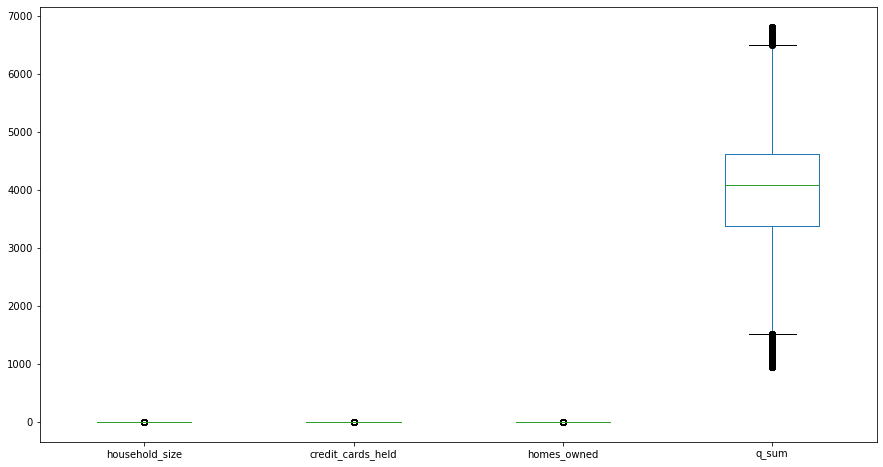

In [31]:
#check outliers
df.boxplot(grid=False, figsize= (15,8))

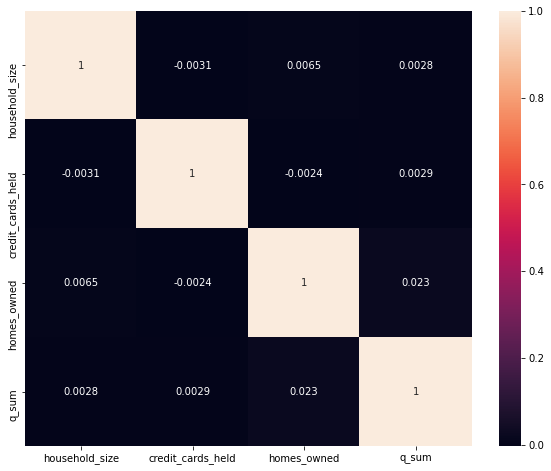

In [32]:
# # check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
# q1, q2 ,q3 have collinearity

In [33]:
# label / encode any categorical columns 

cat = df.select_dtypes(include = np.object)
cat

,offer_accepted,reward,mailer_type,income_level,credit_rating,own_your_home
0,No,Air Miles,Letter,High,High,Yes
1,No,Air Miles,Letter,High,High,Yes
2,No,Air Miles,Letter,High,High,No
3,No,Air Miles,Letter,High,High,No
4,No,Air Miles,Letter,High,High,Yes
...,...,...,...,...,...,...
17937,Yes,Points,Postcard,Medium,Low,Yes
17938,Yes,Points,Postcard,Medium,Low,Yes
17939,Yes,Points,Postcard,Medium,Low,No
17940,Yes,Points,Postcard,Medium,Low,Yes


In [34]:
# # checking all the categorical columns
# cols_cat = ['offer_accepted', 'reward', 'mailer_type', 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home']
# for col in cols_cat:
#     print("Frequency analysis of column: ",col)
#     my_data = df[col].value_counts().reset_index()
#     my_data.drop(my_data.index[0])
#     ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
#     plt.figure()


In [35]:
#df.describe()

In [36]:
#a =df['average_balance'].value_counts().reset_index()
#a.drop(a.index[0])

In [37]:
# locate the target column in the last position
cols = list(df.columns)
cols = cols[1:]+[cols[0]]
df = df[cols]


In [38]:
#df.head()

In [39]:
#df.dtypes

In [40]:
# convert balances to float

#df['q2_balance'] = pd.to_numeric(df.q2_balance, errors='coerce')
#df['q3_balance'] = pd.to_numeric(df.q3_balance, errors='coerce')
#df['q4_balance'] = pd.to_numeric(df.q4_balance, errors='coerce')


In [41]:
#df.dtypes

### Density Plots

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable. It is a smoothed version of the histogram and is used in the same concept.

Kernel Density Estimation(KDE): Kernel density estimation is a really useful statistical tool with an intimidating name. Often shortened to KDE, it’s a technique that let’s you create a smooth curve given a set of data. Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis.

In [42]:
numerics = ['int64', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num
# for col in df_num.columns:
#     ax = sns.kdeplot(data= df_num, x= col, shade= True)
#     plt.figure()

,household_size,credit_cards_held,homes_owned,q_sum
0,1,1,1,2833.0
1,1,1,2,5062.0
2,1,2,1,3248.0
3,1,2,1,4494.0
4,1,2,1,3740.0
...,...,...,...,...
17937,5,2,1,3823.0
17938,5,2,2,4593.0
17939,6,1,1,4314.0
17940,6,1,1,1069.0


In [43]:
# for col in df_num.columns:
#     plt.figure(figsize=(10,6)) 
#     sns.kdeplot(df[col][df.offer_accepted  == 'Yes'], shade=True)
#     sns.kdeplot(df[col][df.offer_accepted  == 'No'], shade=True)
#     plt.legend(['offer_accepted ', 'offer_rejected'])
#     plt.title(col)
#     plt.show()


In [44]:
# check outliers
#df.boxplot(grid=False, figsize= (15,8))

Note: the quartiles didn't removed all the outliers for average_balance. It could be improved.

array([[<AxesSubplot:title={'center':'household_size'}>,
        <AxesSubplot:title={'center':'credit_cards_held'}>,
        <AxesSubplot:title={'center':'homes_owned'}>,
        <AxesSubplot:title={'center':'q_sum'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

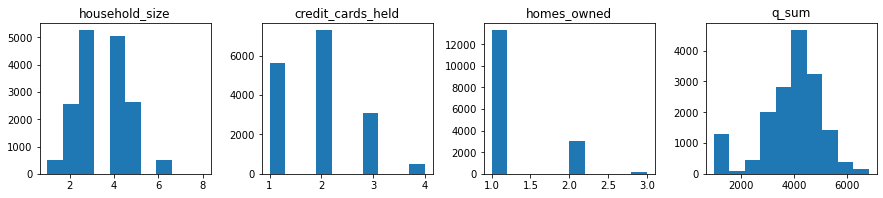

In [45]:
df.hist(figsize=(15,10),layout=(3,4), grid=False)

In [46]:
#df.shape

### Pre-processing <a class="anchor" id="preprocessing"></a>


In [47]:
#cat.head()

In [48]:
#cat.columns

In [49]:
# reset index
df = df.reset_index(drop = True)

In [50]:
#df.head()

In [51]:
# categorical = pd.get_dummies(cat, columns =['reward', 'mailer_type', 'income_level',
#        'overdraft_protection', 'credit_rating', 'own_your_home',
#        'average_balance', 'offer_accepted'],drop_first=True)

cat = df.select_dtypes(exclude = ['float64'])
cat.info()

# categorical.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16505 entries, 0 to 16504
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   reward              16505 non-null  object  
 1   mailer_type         16505 non-null  object  
 2   income_level        16505 non-null  object  
 3   household_size      16505 non-null  int64   
 4   credit_rating       16505 non-null  object  
 5   credit_cards_held   16505 non-null  int64   
 6   homes_owned         16505 non-null  int64   
 7   own_your_home       16505 non-null  object  
 8   bank_accounts_open  16505 non-null  category
 9   offer_accepted      16505 non-null  object  
dtypes: category(1), int64(3), object(6)
memory usage: 1.1+ MB


In [52]:
# create a list of the column names
cat_col=cat.columns.to_list()
cat_col

['reward',
 'mailer_type',
 'income_level',
 'household_size',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'own_your_home',
 'bank_accounts_open',
 'offer_accepted']

In [53]:
categorical = pd.get_dummies(cat, columns =['reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'own_your_home',
 'household_size',
 'offer_accepted'],drop_first=True)

In [54]:
#categorical.head()

In [55]:
#categorical['offer_accepted_Yes'].value_counts()

In [56]:
# percentage
#pct_offer_accepted = 1023/18000
#pct_offer_accepted

In [57]:
# numerical scaling 
from sklearn.preprocessing import Normalizer

In [58]:
# df_num are the numerical

X = df_num.drop(['household_size', 'credit_cards_held', 'homes_owned'], axis=1)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised)

In [59]:
X_normalised


,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
16500,1.0
16501,1.0
16502,1.0
16503,1.0


### Split off the dependant variable (label) <a class="anchor" id="split"></a>

In [60]:
#sort out the categoricals 
y= categorical['offer_accepted_Yes']
categorical=categorical.drop(['offer_accepted_Yes'], axis=1)
#categorical

In [61]:
#y

In [62]:
#categorical

In [63]:
# bring the numerical data (scaled)in with the x cat
X = np.concatenate((X_normalised, categorical),axis=1)



### TT split, get model <a class="anchor" id="ttsplit"></a>

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

### Apply model and train model <a class="anchor" id="applymodel"></a>

In [66]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

### Evaluate accuracy and test <a class="anchor" id="evaluate"></a>

In [67]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [68]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [69]:
accuracy_score(y_test, predictions)

0.9453196001211754

In [70]:
# next steps would be to visualise the accuracy of the predictions in some ways 

# can i improve my model ?? 

### Visualising accuracy - ROC / AUC  <a class="anchor" id="rocauc"></a>

In [71]:
import sklearn.metrics as metrics 
probs = classification.predict_proba(X_test)
preds =probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.750780625485741


In [72]:
#definitions 
# tpr = true positive rate 
# fpr = false positive rate

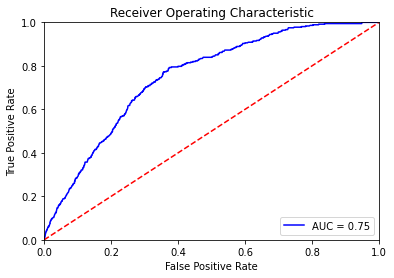

In [73]:
#method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
# confusion matrix 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

#accuracy_score(y_test,predictions)
#confusion_matrix(y_test,predictions)
#plot_confusion_matrix(classification, X_test, y_test)
#plt.show()


### Data imbalanced -  SMOTE (oversample the minority class of the target label) <a class="anchor" id="smote"></a>

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smote = SMOTE()


In [77]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    15572
0    15572
Name: offer_accepted_Yes, dtype: int64

In [78]:
#re do train test split It2

X_train, X_test, y_train, y_test =train_test_split(X_sm, y_sm, test_size= 0.4, random_state=40)

In [79]:
# apply model It2 
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [80]:
#accuracy assessment It2
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.6982661743458018

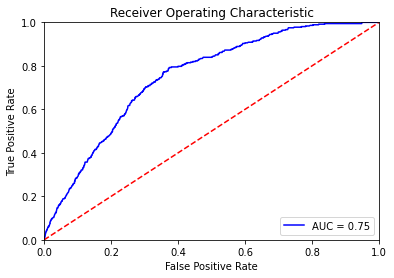

In [81]:
#method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

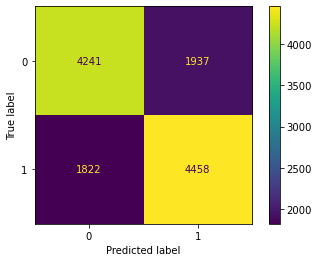

In [82]:
#Conf matrix It2 
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

#### conclusion on imbalance:

- The SMOTE technique solved the imbalanced but the accuracy got too low (71%), but the TOMEK doesn't.
    

### References
- lectures
- women who code: munibootcamp of data science
- https://machinelearningmastery.com/confusion-matrix-machine-learning/
- https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02
    